<a href="https://colab.research.google.com/github/gurunzpritam/AIT_INTERNSHIP/blob/main/yolonasfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLO-NAS on Custom Dataset

This notebook is based on official [YOLO-NAS Notebook](https://colab.research.google.com/drive/1q0RmeVRzLwRXW-h9dPFSOchwJkThUy6d?usp=sharing) by DECI AI.

![YOLO-NAS on RF100](https://raw.githubusercontent.com/Deci-AI/super-gradients/master/documentation/source/images/yolo_nas_rf100.png)

## ‚ö†Ô∏è Disclaimer

YOLO-NAS is still very fresh. If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLO-NAS
- Inference with pre-trained COCO model
- Finding open source datasets
- ‚≠êÔ∏è Training YOLO-NAS on your custom dataset ‚≠êÔ∏è
- Load trained model
- Evaluate trained model
- Inference with trained model

## üî• Let's begin! 

## ‚ö° Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue May 16 03:27:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Install YOLO-NAS


In [2]:
!pip install -q super-gradients==3.1.1
!pip install -q roboflow
!pip install -q supervision

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 964.2/964.2 kB 8.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 887.5/887.5 MB 1.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 135.6/135.6 kB 16.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 684.5/684.5 kB 63.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.9/2.9 MB 100.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.8/2.8 MB 92.3 MB/s eta 0:00:00
     ‚îÅ

### üö® Restart the runtime

**After installation is complete, you'll need to restart the runtime after installation completes. Navigate to `Runtime` -> `Restart runtime` and confirm by clicking `Yes` when you see the popup.**

After that, carry on with the notebook starting from the cell below üëá

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant. 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/AIT

/content/gdrive/MyDrive/AIT


In [3]:
import torch

DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
MODEL_ARCH = 'yolo_nas_l'

In [4]:
from super_gradients.training import models

model = models.get(MODEL_ARCH, pretrained_weights="coco").to(DEVICE)

[2023-05-16 03:32:14] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-05-16 03:32:20] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-05-16 03:32:20] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-05-16 03:32:20] WARNING - export.py - Failed to import pytorch_quantization
[2023-05-16 03:32:20] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-05-16 03:32:21] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


  0%|          | 0.00/256M [00:00<?, ?B/s]

Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth


# Training YOLO-NAS on a Custom Dataset

## Preparing a custom¬†dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images or video

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together. 

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




## Fine-tune on custom dataset

`ckpt_root_dir` - this is the directory where results from all your experiments will be saved

`experiment_name` - all checkpoints, logs, and tensorboards will be saved in a directory with the name you specify here. 

In [5]:
MODEL_ARCH = 'yolo_nas_l'
BATCH_SIZE = 16
MAX_EPOCHS = 50
CHECKPOINT_DIR = '/content/gdrive/MyDrive/AIT/results'
EXPERIMENT_NAME = '/content/gdrive/MyDrive/AIT/experiments'
CLASSES = ['waste']
LOCATION = '/content/gdrive/MyDrive/AIT'

In [6]:
from super_gradients.training import Trainer

trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)

In [10]:
dataset_params = {
    'data_dir': LOCATION,
    'train_images_dir':'/content/gdrive/MyDrive/AIT/data/train/images',
    'train_labels_dir':'/content/gdrive/MyDrive/AIT/data/train/labels',
    'val_images_dir':'/content/gdrive/MyDrive/AIT/data/val/images',
    'val_labels_dir':'/content/gdrive/MyDrive/AIT/data/val/labels',
    'test_images_dir':'/content/gdrive/MyDrive/AIT/data/test/images',
    'test_labels_dir':'/content/gdrive/MyDrive/AIT/data/test/labels',
    'classes': CLASSES
}

In [11]:
from super_gradients.training.dataloaders.dataloaders import (
    coco_detection_yolo_format_train, coco_detection_yolo_format_val)

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

Caching annotations:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 106/107 [01:03<00:00,  1.71it/s]

**NOTE:** Let's inspect our dataset

In [12]:
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': [640, 640], 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': [640, 640], 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5, 'max_targets': 120),
 DetectionPaddedRescale('swap': (2, 0, 1),

### Instantiate the model

In [13]:
from super_gradients.training import models

model = models.get(
    MODEL_ARCH, 
    num_classes=len(dataset_params['classes']), 
    pretrained_weights="coco"
)

[2023-05-16 03:55:23] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


### Define metrics and training parameters

In [14]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

### Train the model

In [15]:
trainer.train(
    model=model, 
    training_params=train_params, 
    train_loader=train_data, 
    valid_loader=val_data
)

[2023-05-16 03:55:29] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
[2023-05-16 03:55:34] INFO - utils.py - NumExpr defaulting to 2 threads.


The console stream is now moved to /content/gdrive/MyDrive/AIT/experiments/console_May16_03_55_35.txt


[2023-05-16 03:55:42] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 1149       (len(train_set))
    - Batch size per GPU:           16         (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             16         (num_gpus * batch_size)
    - Effective Batch size:         16         (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         71         (len(train_loader))
    - Gradient updates per epoch:   71         (len(train_loader) / batch_accumulate)

[2023-05-16 03:55:42] INFO - sg_trainer.py - Started training for 50 epochs (0/49)

Validation epoch 0: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:11<00:00,  1.54it/s]


SUMMARY OF EPOCH 0
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 3.7429
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 2.3582
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.0441
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.3451
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0032
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.0148
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 3.6336
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 2.4014
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.9314
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.3066
    ‚îú‚îÄ‚îÄ Precision@0.50 = 1.0
    ‚îî‚îÄ‚îÄ Recall@0.50 = 0.0016



[2023-05-16 03:57:58] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 03:57:58] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.01482253335416317
Validation epoch 1: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:11<00:00,  1.54it/s]


SUMMARY OF EPOCH 1
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 2.4328
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 3.7429 (‚Üò -1.3102)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 3.7429 (‚Üò -1.3102)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.2663
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 2.3582 (‚Üò -1.0918)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 2.3582 (‚Üò -1.0918)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.863
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.0441 (‚Üò -0.1811)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.0441 (‚Üò -0.1811)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.294
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.3451 (‚Üò -0.0511)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.3451 (‚Üò -0.0511)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0292
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0032 (‚Üó 0.0259)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0032 (‚Üó 0.0259)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.3387
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0148 (‚Üó 0.3239)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0148 (‚Üó 0.32

[2023-05-16 04:00:32] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 04:00:32] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.33870673179626465
Validation epoch 2: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.46it/s]


SUMMARY OF EPOCH 2
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 2.2
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 2.4328 (‚Üò -0.2328)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 2.4328 (‚Üò -0.2328)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0934
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.2663 (‚Üò -0.1729)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.2663 (‚Üò -0.1729)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.8184
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.863  (‚Üò -0.0445)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.863  (‚Üò -0.0445)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.279
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.294  (‚Üò -0.015)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.294  (‚Üò -0.015)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0637
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0292 (‚Üó 0.0345)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0292 (‚Üó 0.0345)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.447
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.3387 (‚Üó 0.1083)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.3387 (‚Üó 0.1083)
 

[2023-05-16 04:03:11] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 04:03:11] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.4470423758029938
Validation epoch 3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:11<00:00,  1.51it/s]


SUMMARY OF EPOCH 3
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 2.1496
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 2.2    (‚Üò -0.0503)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 2.2    (‚Üò -0.0503)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0367
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.0934 (‚Üò -0.0567)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.0934 (‚Üò -0.0567)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.8267
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8184 (‚Üó 0.0083)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8184 (‚Üó 0.0083)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2798
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.279  (‚Üó 0.0009)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.279  (‚Üó 0.0009)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0205
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0637 (‚Üò -0.0432)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0637 (‚Üò -0.0432)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.4803
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.447  (‚Üó 0.0332)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.447  (‚Üó 0.03

[2023-05-16 04:05:55] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 04:05:55] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.4802856147289276
Validation epoch 4: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.41it/s]


SUMMARY OF EPOCH 4
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 2.1139
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 2.1496 (‚Üò -0.0358)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 2.1496 (‚Üò -0.0358)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0128
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.0367 (‚Üò -0.0239)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.0367 (‚Üò -0.0239)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.843
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8184 (‚Üó 0.0245)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8267 (‚Üó 0.0162)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2718
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.279  (‚Üò -0.0071)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2798 (‚Üò -0.008)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0386
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0637 (‚Üò -0.0251)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0205 (‚Üó 0.0182)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.5118
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.4803 (‚Üó 0.0315)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.4803 (‚Üó 0.031

[2023-05-16 04:08:46] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 04:08:46] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5118100047111511
Validation epoch 5: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:11<00:00,  1.51it/s]


SUMMARY OF EPOCH 5
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 2.0682
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 2.1139 (‚Üò -0.0456)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 2.1139 (‚Üò -0.0456)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9991
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.0128 (‚Üò -0.0136)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.0128 (‚Üò -0.0136)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7998
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8184 (‚Üò -0.0186)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.843  (‚Üò -0.0432)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2677
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2718 (‚Üò -0.0042)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2718 (‚Üò -0.0042)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0323
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0637 (‚Üò -0.0314)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0386 (‚Üò -0.0064)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.5481
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.5118 (‚Üó 0.0363)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.5118 (‚Üó 

[2023-05-16 04:11:34] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 04:11:34] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5480825304985046
Validation epoch 6: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.47it/s]


SUMMARY OF EPOCH 6
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 2.0314
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 2.0682 (‚Üò -0.0368)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 2.0682 (‚Üò -0.0368)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9753
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.9991 (‚Üò -0.0239)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.9991 (‚Üò -0.0239)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7986
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7998 (‚Üò -0.0012)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7998 (‚Üò -0.0012)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2627
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2677 (‚Üò -0.0049)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2677 (‚Üò -0.0049)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0384
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0637 (‚Üò -0.0253)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0323 (‚Üó 0.0061)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.5364
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.5481 (‚Üò -0.0116)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.5481 (‚Üò 

Validation epoch 7: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.45it/s]


SUMMARY OF EPOCH 7
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.9783
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 2.0314 (‚Üò -0.053)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 2.0314 (‚Üò -0.053)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9557
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.9753 (‚Üò -0.0196)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.9753 (‚Üò -0.0196)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7654
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7986 (‚Üò -0.0331)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7986 (‚Üò -0.0331)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.256
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2627 (‚Üò -0.0068)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2627 (‚Üò -0.0068)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0384
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0637 (‚Üò -0.0253)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0384 (‚Üó 0.0001)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.569
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.5481 (‚Üó 0.0209)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.5364 (‚Üó 0.032

[2023-05-16 04:17:29] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 04:17:29] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5689535140991211
Validation epoch 8: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.49it/s]


SUMMARY OF EPOCH 8
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.9982
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.9783 (‚Üó 0.0199)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.9783 (‚Üó 0.0199)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9771
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.9557 (‚Üó 0.0214)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.9557 (‚Üó 0.0214)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7706
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7654 (‚Üó 0.0052)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7654 (‚Üó 0.0052)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2543
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.256  (‚Üò -0.0016)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.256  (‚Üò -0.0016)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0307
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0637 (‚Üò -0.033)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0384 (‚Üò -0.0077)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6135
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.569  (‚Üó 0.0445)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.569  (‚Üó 0.0445)

[2023-05-16 04:20:39] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 04:20:39] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6134852170944214
Validation epoch 9: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:11<00:00,  1.50it/s]


SUMMARY OF EPOCH 9
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.9335
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.9783 (‚Üò -0.0448)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.9982 (‚Üò -0.0647)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9301
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.9557 (‚Üò -0.0256)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.9771 (‚Üò -0.0469)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7694
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7654 (‚Üó 0.004)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7706 (‚Üò -0.0012)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2475
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2543 (‚Üò -0.0069)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2543 (‚Üò -0.0069)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0551
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0637 (‚Üò -0.0086)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0307 (‚Üó 0.0244)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.1969
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6135 (‚Üò -0.4166)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6135 (‚Üò -0

Validation epoch 10: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.49it/s]


SUMMARY OF EPOCH 10
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.9412
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.9335 (‚Üó 0.0076)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.9335 (‚Üó 0.0076)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9361
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.9301 (‚Üó 0.006)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.9301 (‚Üó 0.006)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7597
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7654 (‚Üò -0.0057)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7694 (‚Üò -0.0097)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2501
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2475 (‚Üó 0.0026)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2475 (‚Üó 0.0026)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0465
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0637 (‚Üò -0.0172)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0551 (‚Üò -0.0086)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.5961
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6135 (‚Üò -0.0173)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.1969 (‚Üó 0.3992

Validation epoch 11: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:13<00:00,  1.36it/s]


SUMMARY OF EPOCH 11
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.943
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.9335 (‚Üó 0.0095)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.9412 (‚Üó 0.0018)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9326
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.9301 (‚Üó 0.0024)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.9361 (‚Üò -0.0035)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7576
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7597 (‚Üò -0.0021)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7597 (‚Üò -0.0021)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2527
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2475 (‚Üó 0.0052)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2501 (‚Üó 0.0026)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0398
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0637 (‚Üò -0.0239)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0465 (‚Üò -0.0067)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.5716
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6135 (‚Üò -0.0419)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.5961 (‚Üò -0.0

Validation epoch 12: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.47it/s]


SUMMARY OF EPOCH 12
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.9477
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.9335 (‚Üó 0.0141)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.943  (‚Üó 0.0046)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9401
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.9301 (‚Üó 0.01)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.9326 (‚Üó 0.0076)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7593
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7576 (‚Üó 0.0017)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7576 (‚Üó 0.0017)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2511
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2475 (‚Üó 0.0037)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2527 (‚Üò -0.0015)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0545
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0637 (‚Üò -0.0092)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0398 (‚Üó 0.0147)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6024
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6135 (‚Üò -0.0111)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.5716 (‚Üó 0.0308)


Validation epoch 13: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.48it/s]


SUMMARY OF EPOCH 13
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.8873
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.9335 (‚Üò -0.0463)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.9477 (‚Üò -0.0604)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9098
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.9301 (‚Üò -0.0203)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.9401 (‚Üò -0.0303)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7438
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7576 (‚Üò -0.0138)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7593 (‚Üò -0.0156)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2422
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2475 (‚Üò -0.0053)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2511 (‚Üò -0.0089)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0542
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0637 (‚Üò -0.0095)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0545 (‚Üò -0.0003)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.5946
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6135 (‚Üò -0.0189)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6024 (‚Ü

Validation epoch 14: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.46it/s]


SUMMARY OF EPOCH 14
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.8652
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.8873 (‚Üò -0.022)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.8873 (‚Üò -0.022)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8943
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.9098 (‚Üò -0.0155)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.9098 (‚Üò -0.0155)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7483
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7438 (‚Üó 0.0046)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7438 (‚Üó 0.0046)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2387
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2422 (‚Üò -0.0035)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2422 (‚Üò -0.0035)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0748
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0637 (‚Üó 0.0111)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0542 (‚Üó 0.0206)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6265
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6135 (‚Üó 0.013)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.5946 (‚Üó 0.0319

[2023-05-16 04:39:29] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 04:39:29] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6264996528625488
Validation epoch 15: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.50it/s]


SUMMARY OF EPOCH 15
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.8599
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.8652 (‚Üò -0.0053)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.8652 (‚Üò -0.0053)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.902
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8943 (‚Üó 0.0077)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8943 (‚Üó 0.0077)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7401
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7438 (‚Üò -0.0036)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7483 (‚Üò -0.0082)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2351
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2387 (‚Üò -0.0036)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2387 (‚Üò -0.0036)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0531
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0748 (‚Üò -0.0217)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0748 (‚Üò -0.0217)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.593
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6265 (‚Üò -0.0335)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6265 (‚Üò -0

Validation epoch 16: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.40it/s]


SUMMARY OF EPOCH 16
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.9084
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.8599 (‚Üó 0.0484)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.8599 (‚Üó 0.0484)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.925
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8943 (‚Üó 0.0307)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.902  (‚Üó 0.023)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7494
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7401 (‚Üó 0.0093)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7401 (‚Üó 0.0093)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2434
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2351 (‚Üó 0.0083)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2351 (‚Üó 0.0083)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0479
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0748 (‚Üò -0.0269)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0531 (‚Üò -0.0052)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6185
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6265 (‚Üò -0.008)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.593  (‚Üó 0.0255)
 

Validation epoch 17: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.46it/s]


SUMMARY OF EPOCH 17
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.8832
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.8599 (‚Üó 0.0232)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.9084 (‚Üò -0.0252)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9108
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8943 (‚Üó 0.0164)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.925  (‚Üò -0.0143)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7336
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7401 (‚Üò -0.0065)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7494 (‚Üò -0.0158)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2422
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2351 (‚Üó 0.0071)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2434 (‚Üò -0.0012)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0709
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0748 (‚Üò -0.0039)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0479 (‚Üó 0.023)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.5993
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6265 (‚Üò -0.0272)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6185 (‚Üò -0.

Validation epoch 18: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.50it/s]


SUMMARY OF EPOCH 18
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.8659
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.8599 (‚Üó 0.006)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.8832 (‚Üò -0.0172)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8912
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8943 (‚Üò -0.0031)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.9108 (‚Üò -0.0196)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7532
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7336 (‚Üó 0.0196)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7336 (‚Üó 0.0196)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2393
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2351 (‚Üó 0.0041)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2422 (‚Üò -0.003)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0483
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0748 (‚Üò -0.0265)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0709 (‚Üò -0.0226)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6283
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6265 (‚Üó 0.0018)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.5993 (‚Üó 0.029

[2023-05-16 04:52:07] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 04:52:07] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6283301711082458
Validation epoch 19: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.42it/s]


SUMMARY OF EPOCH 19
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.837
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.8599 (‚Üò -0.0229)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.8659 (‚Üò -0.029)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8872
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8912 (‚Üò -0.004)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8912 (‚Üò -0.004)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7299
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7336 (‚Üò -0.0037)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7532 (‚Üò -0.0233)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2339
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2351 (‚Üò -0.0012)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2393 (‚Üò -0.0053)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0605
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0748 (‚Üò -0.0143)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0483 (‚Üó 0.0122)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6447
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6283 (‚Üó 0.0163)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6283 (‚Üó 0.01

[2023-05-16 04:55:38] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 04:55:38] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6446696519851685
Validation epoch 20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.40it/s]


SUMMARY OF EPOCH 20
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.839
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.837  (‚Üó 0.0021)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.837  (‚Üó 0.0021)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8886
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8872 (‚Üó 0.0014)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8872 (‚Üó 0.0014)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7257
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7299 (‚Üò -0.0042)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7299 (‚Üò -0.0042)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.235
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2339 (‚Üó 0.0011)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2339 (‚Üó 0.0011)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0524
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0748 (‚Üò -0.0224)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0605 (‚Üò -0.0081)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6478
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6447 (‚Üó 0.0031)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6447 (‚Üó 0.0031)

[2023-05-16 04:58:58] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 04:58:58] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6478082537651062
Validation epoch 21: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.50it/s]


SUMMARY OF EPOCH 21
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.8352
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.837  (‚Üò -0.0018)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.839  (‚Üò -0.0039)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8832
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8872 (‚Üò -0.004)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8886 (‚Üò -0.0054)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7287
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7257 (‚Üó 0.0029)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7257 (‚Üó 0.0029)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2351
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2339 (‚Üó 0.0011)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.235  (‚Üó 0.0)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0652
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0748 (‚Üò -0.0096)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0524 (‚Üó 0.0128)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6529
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6478 (‚Üó 0.0051)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6478 (‚Üó 0.0051)


[2023-05-16 05:02:22] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 05:02:22] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6528890132904053
Validation epoch 22: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.50it/s]


SUMMARY OF EPOCH 22
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.8111
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.8352 (‚Üò -0.0241)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.8352 (‚Üò -0.0241)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8758
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8832 (‚Üò -0.0074)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8832 (‚Üò -0.0074)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7213
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7257 (‚Üò -0.0044)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7287 (‚Üò -0.0074)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2299
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2339 (‚Üò -0.0041)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2351 (‚Üò -0.0052)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0832
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0748 (‚Üó 0.0084)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0652 (‚Üó 0.0181)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.663
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6529 (‚Üó 0.0101)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6529 (‚Üó 0.

[2023-05-16 05:05:58] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 05:05:58] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6630274653434753
Validation epoch 23: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.44it/s]


SUMMARY OF EPOCH 23
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.808
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.8111 (‚Üò -0.0031)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.8111 (‚Üò -0.0031)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8655
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8758 (‚Üò -0.0102)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8758 (‚Üò -0.0102)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.732
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7213 (‚Üó 0.0107)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7213 (‚Üó 0.0107)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2306
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2299 (‚Üó 0.0007)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2299 (‚Üó 0.0007)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0381
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0832 (‚Üò -0.0451)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0832 (‚Üò -0.0451)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6171
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.663  (‚Üò -0.0459)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.663  (‚Üò -0.0

Validation epoch 24: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.48it/s]


SUMMARY OF EPOCH 24
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.8
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.808  (‚Üò -0.008)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.808  (‚Üò -0.008)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.866
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8655 (‚Üó 0.0004)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8655 (‚Üó 0.0004)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7267
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7213 (‚Üó 0.0054)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.732  (‚Üò -0.0053)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2283
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2299 (‚Üò -0.0016)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2306 (‚Üò -0.0023)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0692
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0832 (‚Üò -0.014)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0381 (‚Üó 0.0311)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6666
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.663  (‚Üó 0.0035)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6171 (‚Üó 0.0494)
  

[2023-05-16 05:13:52] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 05:13:52] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.666562020778656
Validation epoch 25: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.42it/s]


SUMMARY OF EPOCH 25
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.7792
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.8    (‚Üò -0.0207)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.8    (‚Üò -0.0207)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8526
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8655 (‚Üò -0.0129)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.866  (‚Üò -0.0134)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7227
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7213 (‚Üó 0.0014)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7267 (‚Üò -0.004)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2261
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2283 (‚Üò -0.0021)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2283 (‚Üò -0.0021)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0493
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0832 (‚Üò -0.0339)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0692 (‚Üò -0.0199)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6529
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6666 (‚Üò -0.0136)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6666 (‚Üò 

Validation epoch 26: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.41it/s]


SUMMARY OF EPOCH 26
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.7665
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.7792 (‚Üò -0.0127)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.7792 (‚Üò -0.0127)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8519
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8526 (‚Üò -0.0007)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8526 (‚Üò -0.0007)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7133
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7213 (‚Üò -0.008)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7227 (‚Üò -0.0094)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2232
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2261 (‚Üò -0.0029)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2261 (‚Üò -0.0029)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0605
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0832 (‚Üò -0.0227)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0493 (‚Üó 0.0113)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6632
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6666 (‚Üò -0.0034)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6529 (‚Üó 

Validation epoch 27: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.40it/s]


SUMMARY OF EPOCH 27
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.7669
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.7665 (‚Üó 0.0004)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.7665 (‚Üó 0.0004)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.845
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8519 (‚Üò -0.0068)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8519 (‚Üò -0.0068)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7235
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7133 (‚Üó 0.0102)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7133 (‚Üó 0.0102)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2241
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2232 (‚Üó 0.0009)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2232 (‚Üó 0.0009)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0838
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0832 (‚Üó 0.0006)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0605 (‚Üó 0.0233)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.677
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6666 (‚Üó 0.0104)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6632 (‚Üó 0.0138)
 

[2023-05-16 05:25:54] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 05:25:54] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6769689321517944
Validation epoch 28: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.41it/s]


SUMMARY OF EPOCH 28
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.7612
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.7665 (‚Üò -0.0054)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.7669 (‚Üò -0.0058)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8502
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.845  (‚Üó 0.0052)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.845  (‚Üó 0.0052)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7153
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7133 (‚Üó 0.002)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7235 (‚Üò -0.0082)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2213
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2232 (‚Üò -0.0019)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2241 (‚Üò -0.0027)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.062
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0838 (‚Üò -0.0219)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0838 (‚Üò -0.0219)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6714
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.677  (‚Üò -0.0056)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.677  (‚Üò -0.

Validation epoch 29: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.46it/s]


SUMMARY OF EPOCH 29
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.7463
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.7612 (‚Üò -0.0149)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.7612 (‚Üò -0.0149)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8444
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.845  (‚Üò -0.0007)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8502 (‚Üò -0.0059)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.716
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7133 (‚Üó 0.0027)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7153 (‚Üó 0.0007)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2176
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2213 (‚Üò -0.0037)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2213 (‚Üò -0.0037)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0499
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0838 (‚Üò -0.0339)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.062  (‚Üò -0.0121)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6626
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.677  (‚Üò -0.0144)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6714 (‚Üò -

Validation epoch 30: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.47it/s]


SUMMARY OF EPOCH 30
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.7163
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.7463 (‚Üò -0.03)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.7463 (‚Üò -0.03)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.825
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8444 (‚Üò -0.0194)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8444 (‚Üò -0.0194)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7052
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7133 (‚Üò -0.0081)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.716  (‚Üò -0.0108)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2155
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2176 (‚Üò -0.0021)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2176 (‚Üò -0.0021)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0663
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0838 (‚Üò -0.0175)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0499 (‚Üó 0.0164)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6864
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.677  (‚Üó 0.0094)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6626 (‚Üó 0.023

[2023-05-16 05:37:46] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 05:37:46] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6863635778427124
Validation epoch 31: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.45it/s]


SUMMARY OF EPOCH 31
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.7237
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.7163 (‚Üó 0.0075)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.7163 (‚Üó 0.0075)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8286
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.825  (‚Üó 0.0036)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.825  (‚Üó 0.0036)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.6974
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7052 (‚Üò -0.0079)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7052 (‚Üò -0.0079)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2186
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2155 (‚Üó 0.0031)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2155 (‚Üó 0.0031)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0793
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0838 (‚Üò -0.0045)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0663 (‚Üó 0.013)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.7087
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6864 (‚Üó 0.0223)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6864 (‚Üó 0.0223)

[2023-05-16 05:41:46] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 05:41:46] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7086562514305115
Validation epoch 32: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.43it/s]


SUMMARY OF EPOCH 32
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.7053
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.7163 (‚Üò -0.011)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.7237 (‚Üò -0.0185)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8192
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.825  (‚Üò -0.0057)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8286 (‚Üò -0.0094)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.6959
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6974 (‚Üò -0.0015)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6974 (‚Üò -0.0015)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2152
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2155 (‚Üò -0.0002)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2186 (‚Üò -0.0034)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0936
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0838 (‚Üó 0.0098)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0793 (‚Üó 0.0143)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6872
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7087 (‚Üò -0.0214)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7087 (‚Üò -

Validation epoch 33: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.41it/s]


SUMMARY OF EPOCH 33
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.6961
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.7053 (‚Üò -0.0092)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.7053 (‚Üò -0.0092)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8184
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8192 (‚Üò -0.0009)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8192 (‚Üò -0.0009)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.689
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6959 (‚Üò -0.0069)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6959 (‚Üò -0.0069)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2133
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2152 (‚Üò -0.0019)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2152 (‚Üò -0.0019)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0928
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0936 (‚Üò -0.0008)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0936 (‚Üò -0.0008)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.7068
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7087 (‚Üò -0.0019)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6872 (‚Üó

Validation epoch 34: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.49it/s]


SUMMARY OF EPOCH 34
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.6964
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.6961 (‚Üó 0.0003)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.6961 (‚Üó 0.0003)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8122
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8184 (‚Üò -0.0062)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8184 (‚Üò -0.0062)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.7021
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.689  (‚Üó 0.0131)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.689  (‚Üó 0.0131)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2132
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2133 (‚Üò -0.0)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2133 (‚Üò -0.0)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0956
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0936 (‚Üó 0.0019)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0928 (‚Üó 0.0028)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6708
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7087 (‚Üò -0.0378)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7068 (‚Üò -0.036)
  

Validation epoch 35: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.42it/s]


SUMMARY OF EPOCH 35
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.6865
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.6961 (‚Üò -0.0095)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.6964 (‚Üò -0.0098)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8036
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8122 (‚Üò -0.0086)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8122 (‚Üò -0.0086)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.6863
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.689  (‚Üò -0.0027)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7021 (‚Üò -0.0158)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2159
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2132 (‚Üó 0.0027)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2132 (‚Üó 0.0027)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0803
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0956 (‚Üò -0.0153)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0956 (‚Üò -0.0153)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6972
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7087 (‚Üò -0.0115)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6708 (‚Üó 

Validation epoch 36: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.47it/s]


SUMMARY OF EPOCH 36
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.6971
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.6865 (‚Üó 0.0105)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.6865 (‚Üó 0.0105)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8161
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8036 (‚Üó 0.0125)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8036 (‚Üó 0.0125)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.6917
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6863 (‚Üó 0.0054)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6863 (‚Üó 0.0054)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.214
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2132 (‚Üó 0.0008)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2159 (‚Üò -0.0019)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.069
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0956 (‚Üò -0.0266)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0803 (‚Üò -0.0113)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6477
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7087 (‚Üò -0.061)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6972 (‚Üò -0.0495)

Validation epoch 37: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.43it/s]


SUMMARY OF EPOCH 37
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.6987
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.6865 (‚Üó 0.0121)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.6971 (‚Üó 0.0016)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8165
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8036 (‚Üó 0.0129)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8161 (‚Üó 0.0003)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.699
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6863 (‚Üó 0.0127)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6917 (‚Üó 0.0073)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2131
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2132 (‚Üò -0.0002)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.214  (‚Üò -0.001)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0667
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0956 (‚Üò -0.0289)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.069  (‚Üò -0.0023)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6976
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7087 (‚Üò -0.011)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6477 (‚Üó 0.05)
 

Validation epoch 38: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.49it/s]


SUMMARY OF EPOCH 38
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.6752
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.6865 (‚Üò -0.0114)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.6987 (‚Üò -0.0235)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7949
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.8036 (‚Üò -0.0087)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8165 (‚Üò -0.0216)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.6977
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6863 (‚Üó 0.0114)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.699  (‚Üò -0.0013)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2126
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2131 (‚Üò -0.0005)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2131 (‚Üò -0.0005)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0758
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0956 (‚Üò -0.0197)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0667 (‚Üó 0.0092)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.7011
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7087 (‚Üò -0.0076)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6976 (‚Üó 

Validation epoch 39: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.47it/s]


SUMMARY OF EPOCH 39
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.6496
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.6752 (‚Üò -0.0255)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.6752 (‚Üò -0.0255)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7896
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7949 (‚Üò -0.0053)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7949 (‚Üò -0.0053)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.6841
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6863 (‚Üò -0.0022)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6977 (‚Üò -0.0136)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2072
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2126 (‚Üò -0.0054)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2126 (‚Üò -0.0054)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0766
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0956 (‚Üò -0.019)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0758 (‚Üó 0.0008)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.6984
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7087 (‚Üò -0.0103)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7011 (‚Üò 

Validation epoch 40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.45it/s]


SUMMARY OF EPOCH 40
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.6447
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.6496 (‚Üò -0.0049)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.6496 (‚Üò -0.0049)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.786
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7896 (‚Üò -0.0037)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7896 (‚Üò -0.0037)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.6772
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6841 (‚Üò -0.0069)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6841 (‚Üò -0.0069)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2081
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2072 (‚Üó 0.0009)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2072 (‚Üó 0.0009)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.088
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0956 (‚Üò -0.0076)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0766 (‚Üó 0.0114)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.713
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7087 (‚Üó 0.0044)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6984 (‚Üó 0.014

[2023-05-16 06:16:11] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 06:16:11] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7130169868469238
Validation epoch 41: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.46it/s]


SUMMARY OF EPOCH 41
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.6726
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.6447 (‚Üó 0.0278)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.6447 (‚Üó 0.0278)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8022
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.786  (‚Üó 0.0162)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.786  (‚Üó 0.0162)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.6833
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6772 (‚Üó 0.0062)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6772 (‚Üó 0.0062)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2115
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2072 (‚Üó 0.0043)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2081 (‚Üó 0.0034)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0592
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0956 (‚Üò -0.0364)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.088  (‚Üò -0.0288)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.703
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.713  (‚Üò -0.0101)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.713  (‚Üò -0.0101

Validation epoch 42: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.40it/s]


SUMMARY OF EPOCH 42
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.6368
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.6447 (‚Üò -0.008)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.6726 (‚Üò -0.0358)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7898
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.786  (‚Üó 0.0039)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.8022 (‚Üò -0.0123)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.6842
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6772 (‚Üó 0.0071)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6833 (‚Üó 0.0009)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2019
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2072 (‚Üò -0.0053)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2115 (‚Üò -0.0096)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.082
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0956 (‚Üò -0.0135)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0592 (‚Üó 0.0229)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.7067
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.713  (‚Üò -0.0064)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.703  (‚Üó 0.00

Validation epoch 43: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.43it/s]


SUMMARY OF EPOCH 43
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.6317
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.6368 (‚Üò -0.0051)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.6368 (‚Üò -0.0051)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7817
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.786  (‚Üò -0.0043)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7898 (‚Üò -0.0082)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.6793
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6772 (‚Üó 0.0021)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6842 (‚Üò -0.0049)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2041
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2019 (‚Üó 0.0022)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2019 (‚Üó 0.0022)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0777
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0956 (‚Üò -0.0178)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.082  (‚Üò -0.0043)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.7007
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.713  (‚Üò -0.0123)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7067 (‚Üò -

Validation epoch 44: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.46it/s]


SUMMARY OF EPOCH 44
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.6275
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.6317 (‚Üò -0.0042)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.6317 (‚Üò -0.0042)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7771
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7817 (‚Üò -0.0046)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7817 (‚Üò -0.0046)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.6747
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6772 (‚Üò -0.0024)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6793 (‚Üò -0.0046)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2052
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2019 (‚Üó 0.0033)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2041 (‚Üó 0.0011)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0732
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0956 (‚Üò -0.0223)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0777 (‚Üò -0.0045)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.7103
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.713  (‚Üò -0.0027)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7007 (‚Üó 

Validation epoch 45: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.42it/s]


SUMMARY OF EPOCH 45
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.6069
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.6275 (‚Üò -0.0205)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.6275 (‚Üò -0.0205)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7715
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7771 (‚Üò -0.0055)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7771 (‚Üò -0.0055)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.661
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.6747 (‚Üò -0.0137)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6747 (‚Üò -0.0137)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.202
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2019 (‚Üó 0.0)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2052 (‚Üò -0.0033)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0786
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0956 (‚Üò -0.0169)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0732 (‚Üó 0.0054)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.7122
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.713  (‚Üò -0.0008)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7103 (‚Üó 0.001

Validation epoch 46: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.40it/s]


SUMMARY OF EPOCH 46
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.6186
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.6069 (‚Üó 0.0116)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.6069 (‚Üó 0.0116)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7803
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7715 (‚Üó 0.0088)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7715 (‚Üó 0.0088)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.6766
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.661  (‚Üó 0.0156)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.661  (‚Üó 0.0156)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2019 (‚Üò -0.0019)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.202  (‚Üò -0.002)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0792
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0956 (‚Üò -0.0163)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0786 (‚Üó 0.0006)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.7153
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.713  (‚Üó 0.0023)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7122 (‚Üó 0.0031)
  

[2023-05-16 06:39:39] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 06:39:39] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7153336405754089
Validation epoch 47: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.45it/s]


SUMMARY OF EPOCH 47
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.6214
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.6069 (‚Üó 0.0145)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.6186 (‚Üó 0.0029)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7784
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7715 (‚Üó 0.0068)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7803 (‚Üò -0.0019)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.6751
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.661  (‚Üó 0.0141)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6766 (‚Üò -0.0015)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2022
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2    (‚Üó 0.0022)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2    (‚Üó 0.0022)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0764
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0956 (‚Üò -0.0191)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0792 (‚Üò -0.0028)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.7144
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7153 (‚Üò -0.0009)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7153 (‚Üò -0.0

Validation epoch 48: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.43it/s]


SUMMARY OF EPOCH 48
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.6175
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.6069 (‚Üó 0.0105)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.6214 (‚Üò -0.004)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.777
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7715 (‚Üó 0.0054)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7784 (‚Üò -0.0014)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.6681
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.661  (‚Üó 0.0071)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6751 (‚Üò -0.0071)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2026
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2    (‚Üó 0.0026)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2022 (‚Üó 0.0004)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0924
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0956 (‚Üò -0.0031)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0764 (‚Üó 0.016)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.7156
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7153 (‚Üó 0.0003)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7144 (‚Üó 0.0012)


[2023-05-16 06:47:26] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 06:47:26] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.715640664100647
Validation epoch 49: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:12<00:00,  1.47it/s]


SUMMARY OF EPOCH 49
‚îú‚îÄ‚îÄ Training
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 1.6018
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 1.6069 (‚Üò -0.0052)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 1.6175 (‚Üò -0.0157)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7625
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7715 (‚Üò -0.009)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.777  (‚Üò -0.0145)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 0.6685
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.661  (‚Üó 0.0075)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.6681 (‚Üó 0.0004)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.202
‚îÇ       ‚îú‚îÄ‚îÄ Best until now = 0.2    (‚Üó 0.002)
‚îÇ       ‚îî‚îÄ‚îÄ Epoch N-1      = 0.2026 (‚Üò -0.0006)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ F1@0.50 = 0.0968
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.0956 (‚Üó 0.0012)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.0924 (‚Üó 0.0044)
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.7297
    ‚îÇ   ‚îú‚îÄ‚îÄ Best until now = 0.7156 (‚Üó 0.0141)
    ‚îÇ   ‚îî‚îÄ‚îÄ Epoch N-1      = 0.7156 (‚Üó 0.0141)

[2023-05-16 06:51:05] INFO - base_sg_logger.py - Checkpoint saved in /content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth
[2023-05-16 06:51:05] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7297471761703491
[2023-05-16 06:52:42] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validation epoch 50: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:13<00:00,  1.77it/s]

## Load trained model

In [25]:
best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    checkpoint_path='/content/gdrive/MyDrive/AIT/experiments/ckpt_best.pth'
)

In [28]:
import torch

DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
MODEL_ARCH = best_model


In [36]:
SOURCE_IMAGE_PATH = '/content/gdrive/MyDrive/AIT/data/test/images/chaoPraya_25092021_20210925191553.jpg'

In [37]:
import cv2

image = cv2.imread(SOURCE_IMAGE_PATH)
result = list(best_model.predict(image, conf=0.35))[0]

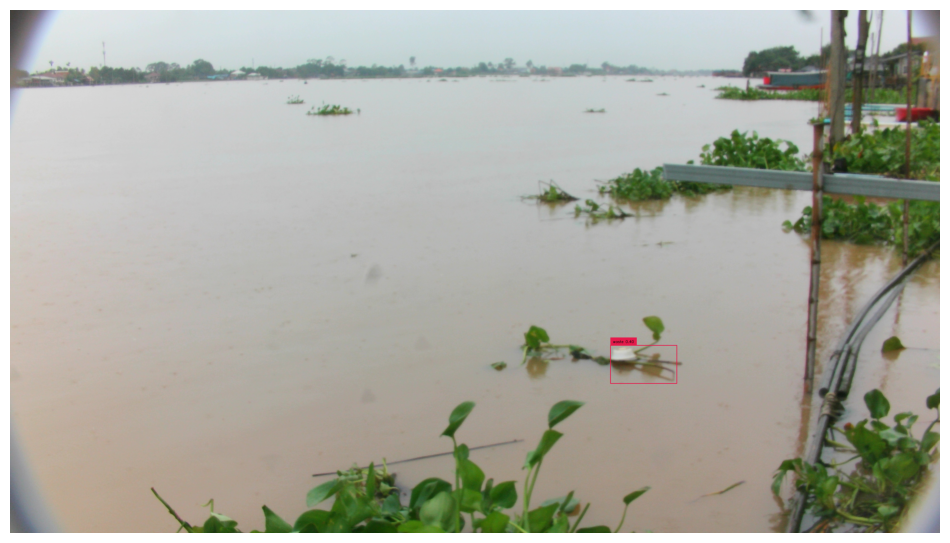

In [38]:
import supervision as sv

detections = sv.Detections(
    xyxy=result.prediction.bboxes_xyxy,
    confidence=result.prediction.confidence,
    class_id=result.prediction.labels.astype(int)
)

box_annotator = sv.BoxAnnotator()

labels = [
    f"{result.class_names[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections
]

annotated_frame = box_annotator.annotate(
    scene=image.copy(),
    detections=detections,
    labels=labels
)

%matplotlib inline
sv.plot_image(annotated_frame, (12, 12))

  # üèÜ Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.